/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


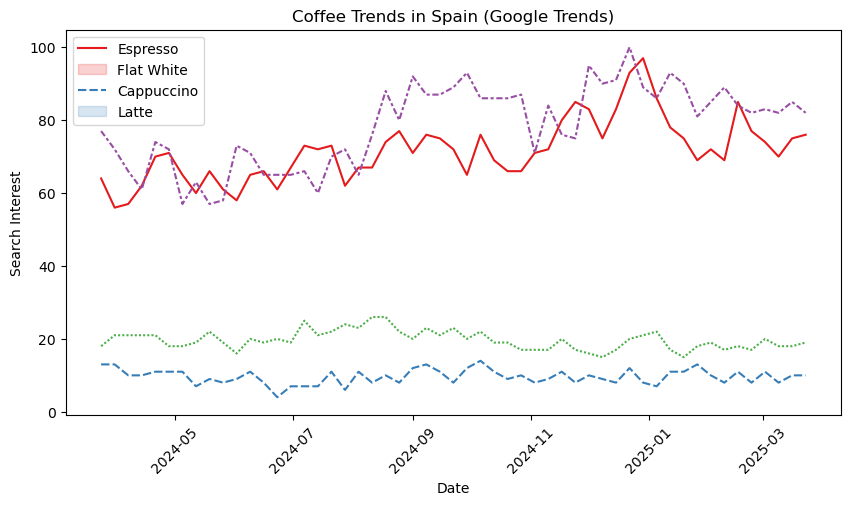

In [2]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

#Google Trends APIの準備をする
pytrends = TrendReq(hl='es-ES', tz=360, requests_args={'headers': {'User-Agent': 'Mozilla/5.0'}})

#コーヒー関連の検索ワードを設定
keywords = ["Espresso", "Flat White", "Cappuccino", "Latte"]

time.sleep(5)
#スペインのGoogle Trendsデータを取得する（過去12ヶ月）
pytrends.build_payload(keywords, geo='ES', timeframe='today 12-m')

time.sleep(5)
#データの取得
trend_data = pytrends.interest_over_time().drop(columns=['isPartial'])

#データの可視化
plt.figure(figsize=(10,5))
sns.lineplot(data=trend_data, palette="Set1")
plt.title("Coffee Trends in Spain (Google Trends)")
plt.xlabel("Date")
plt.ylabel("Search Interest")
plt.legend(keywords)
plt.xticks(rotation=45)
plt.show()

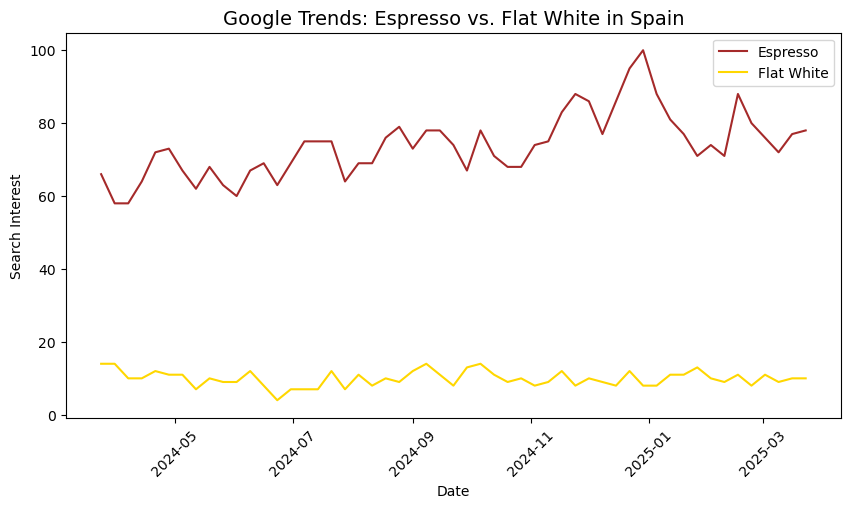

In [3]:
#２つのキーワードで比較する
compare_keywords = ["Espresso", "Flat White"]
pytrends.build_payload(compare_keywords, geo='ES', timeframe='today 12-m')

#データ取得
trend_compare = pytrends.interest_over_time().drop(columns=['isPartial'])

#グラフ
plt.figure(figsize=(10,5))
plt.plot(trend_compare.index, trend_compare["Espresso"], label="Espresso", color="brown")
plt.plot(trend_compare.index, trend_compare["Flat White"], label="Flat White", color="gold")

plt.title("Google Trends: Espresso vs. Flat White in Spain", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Search Interest")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [8]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'Hiragano Maru Gothic Pro'

#日本語のフォントの一覧を確認
for font in fm.findSystemFonts():
    if 'Hira' in font or 'MS' in font:
        print(font)

/opt/X11/share/system_fonts/Supplemental/Trebuchet MS Bold Italic.ttf
/System/Library/Fonts/Supplemental/Trebuchet MS Italic.ttf
/System/Library/Fonts/Supplemental/Comic Sans MS.ttf
/opt/X11/share/system_fonts/Supplemental/Trebuchet MS Bold.ttf
/System/Library/Fonts/Supplemental/Trebuchet MS.ttf
/System/Library/Fonts/Supplemental/Trebuchet MS Bold.ttf
/opt/X11/share/system_fonts/Supplemental/Comic Sans MS Bold.ttf
/opt/X11/share/system_fonts/Supplemental/Trebuchet MS Italic.ttf
/System/Library/Fonts/Supplemental/Comic Sans MS Bold.ttf
/opt/X11/share/system_fonts/Supplemental/Trebuchet MS.ttf
/opt/X11/share/system_fonts/Supplemental/Comic Sans MS.ttf
/System/Library/Fonts/Supplemental/Trebuchet MS Bold Italic.ttf
/opt/X11/share/system_fonts/Hiragino Sans GB.ttc
/System/Library/Fonts/Hiragino Sans GB.ttc


/var/folders/3c/m52yf_450sn453z0ckztffjm0000gn/T/ipykernel_3213/2245418875.py:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  trend_data.fillna(method='ffill', inplace=True)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


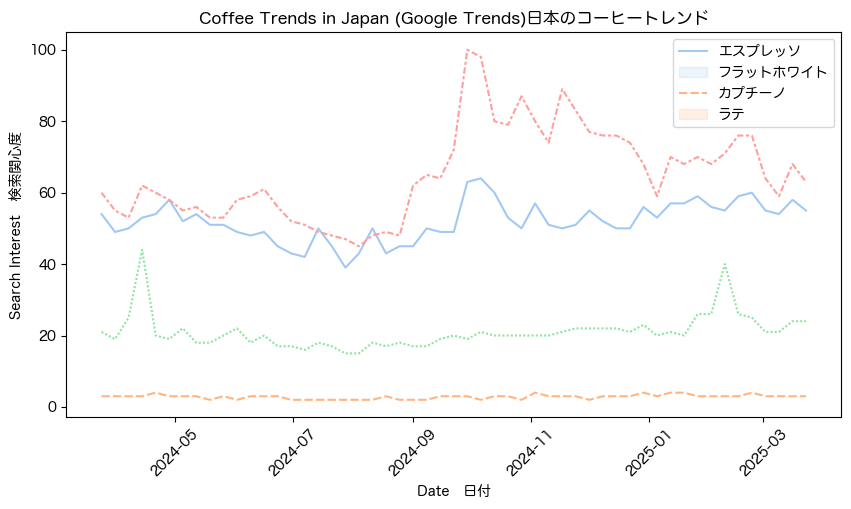

In [10]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pytrends.request import TrendReq
import matplotlib.font_manager as fm

#日本語フォントを指定、今回は IPAexGothic(他にMeiGothic,Osakaなどがある)
plt.rcParams['font.family'] = 'Hiragino Maru Gothic Pro'

#日本のトレンド分析User-Agentを指定
pytrends = TrendReq(hl='jp-JP', tz=360, requests_args={'headers': {'User-Agent': 'Mozilla/5.0'}})
keywords = ["エスプレッソ", "フラットホワイト", "カプチーノ", "ラテ"]

#5秒のスリープを入れて連続リクエストを防ぐ
time.sleep(5)
#データ取得
pytrends.build_payload(keywords, geo='JP', timeframe='today 12-m')

#もう一回スリープ
time.sleep(5)

#データ取得
trend_data = pytrends.interest_over_time().drop(columns=['isPartial'])

#データクレンジングとして入れる（無限大値をNaNに置き換え）
trend_data.replace([np.inf, -np.inf], np.nan, inplace=True)
#NaNがあれば適切に処理（今回は直前の値で埋める）
trend_data.fillna(method='ffill', inplace=True)

#可視化
plt.figure(figsize=(10,5))
sns.lineplot(data=trend_data, palette="pastel")
plt.title("Coffee Trends in Japan (Google Trends)日本のコーヒートレンド")
plt.xlabel("Date　日付")
plt.ylabel("Search Interest　検索関心度")
plt.legend(keywords)
plt.xticks(rotation=45)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


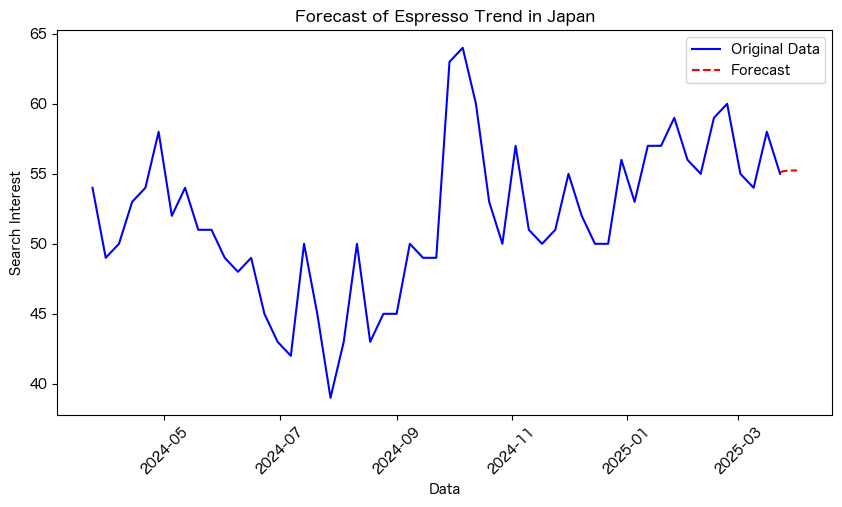

In [12]:
#ARIMA(AutoRegressive Integrated Moving Average)で時系列データの予測を行う。
trend_data.index = pd.to_datetime(trend_data.index)


from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

#ATIMAモデルの適用（１、１、１）モデルのパラメータ
model = ARIMA(trend_data['エスプレッソ'], order=(1, 1, 1))
model_fit = model.fit()

#未来の予測（10日後）
forecast = model_fit.forecast(steps=10)

#予測インデックス（日付を指定）
forecast_index = pd.date_range(start=trend_data.index[-1], periods=10, freq='D')
#予測結果のプロット
plt.figure(figsize=(10,5))
plt.plot(trend_data.index, trend_data['エスプレッソ'], label='Original Data', color='blue')
plt.plot(forecast_index, forecast, label='Forecast', color='red', linestyle='dashed')
plt.xlabel("Data")
plt.ylabel("Search Interest")
plt.title("Forecast of Espresso Trend in Japan")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [14]:
#MAE(Mean Absolute Error)と　RMSE(Root Mean Square Error)モデル評価
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

actual_data = trend_data['エスプレッソ'].iloc[-10:].values #予測する最後の10日分の実際のデータ

#予測データ(ARIMAで予測したデータ)
predicted_data = forecast

#実際のデータと予測データを比較する
mae = mean_absolute_error(actual_data, predicted_data)
print(f"Mean Absolute Error(MAE): {mae}")

#RMSE(Root Mean Squared Eror)
rmse = np.sqrt(mean_squared_error(actual_data, predicted_data))
print(f"Root Mean Squared Error(RMSE): {rmse}")

Mean Absolute Error(MAE): 1.9790134943962585
Root Mean Squared Error(RMSE): 2.5574323584526013
